In [1]:
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv('kyphosis.csv')

In [2]:
df.head()#age is in months

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.3+ KB


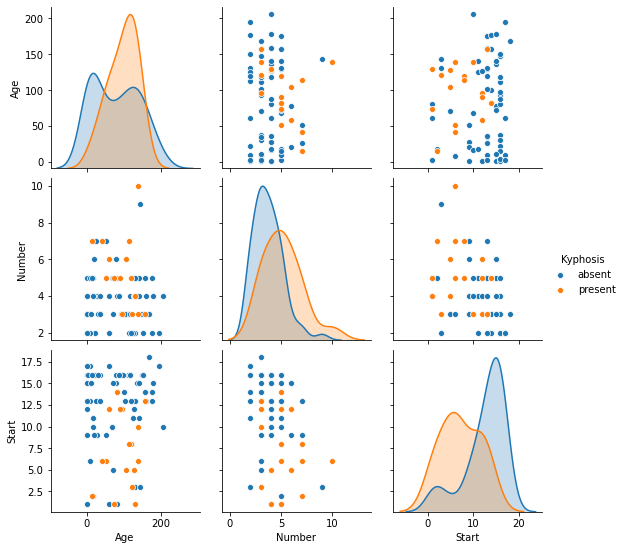

In [4]:
sns.pairplot(data=df,hue='Kyphosis')

In [5]:
X=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']
from sklearn.model_selection import train_test_split


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [9]:
pre=dtree.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pre))
print(classification_report(y_test,pre))

[[17  4]
 [ 1  3]]
              precision    recall  f1-score   support

      absent       0.94      0.81      0.87        21
     present       0.43      0.75      0.55         4

    accuracy                           0.80        25
   macro avg       0.69      0.78      0.71        25
weighted avg       0.86      0.80      0.82        25



In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rfc=RandomForestClassifier(n_estimators=300)

In [13]:
rfc.fit(X_train,y_train)
type(df)

pandas.core.frame.DataFrame

In [14]:
prey=rfc.predict(X_test)

In [15]:
print(confusion_matrix(y_test,prey))
print(classification_report(y_test,prey))

[[20  1]
 [ 2  2]]
              precision    recall  f1-score   support

      absent       0.91      0.95      0.93        21
     present       0.67      0.50      0.57         4

    accuracy                           0.88        25
   macro avg       0.79      0.73      0.75        25
weighted avg       0.87      0.88      0.87        25



In [16]:
df=pd.read_csv('loan_data.csv')

In [17]:
df.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1010.2+ KB


Text(0.5, 0, 'FICO')

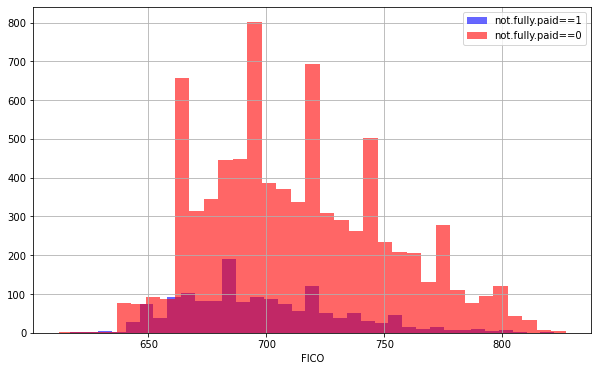

In [19]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(bins=35,color='blue',label='not.fully.paid==1',alpha=0.6)
df[df['not.fully.paid']==0]['fico'].hist(bins=35,color='red',label='not.fully.paid==0',alpha=0.6)
plt.legend()
plt.xlabel('FICO')

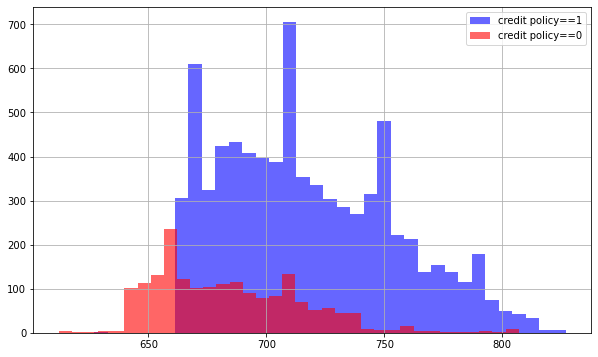

In [20]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(bins=35,color='blue',label='credit policy==1',alpha=0.6)
df[df['credit.policy']==0]['fico'].hist(bins=35,color='red',label='credit policy==0',alpha=0.6)
plt.legend()

<AxesSubplot:xlabel='purpose', ylabel='count'>

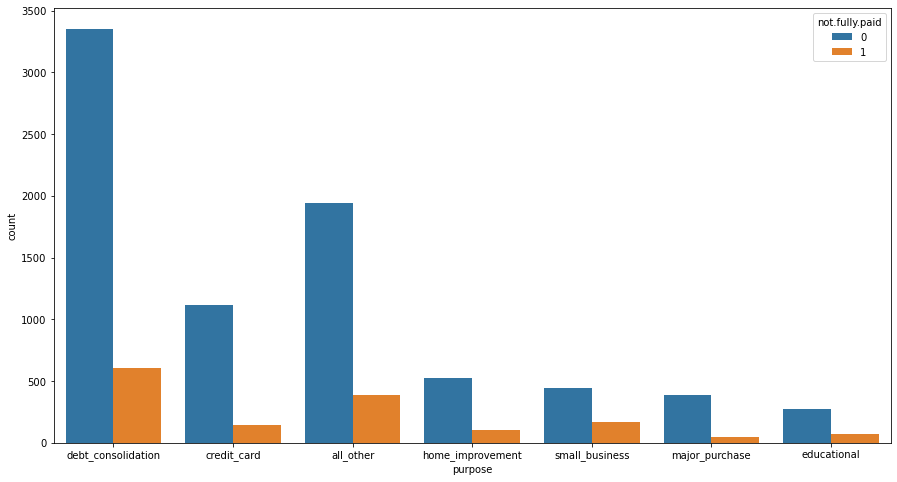

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(data=df,x='purpose',hue='not.fully.paid')

<Figure size 1080x720 with 0 Axes>

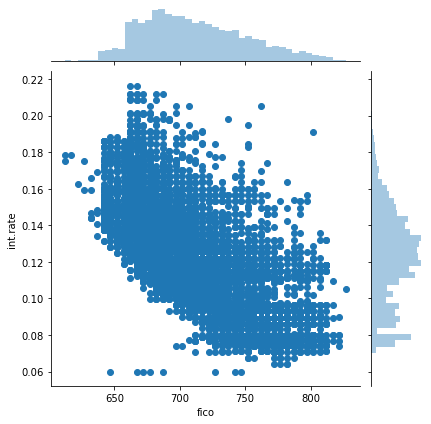

In [22]:
plt.figure(figsize=(15,10))
sns.jointplot(x='fico',y='int.rate',data=df)

<Figure size 1080x720 with 0 Axes>

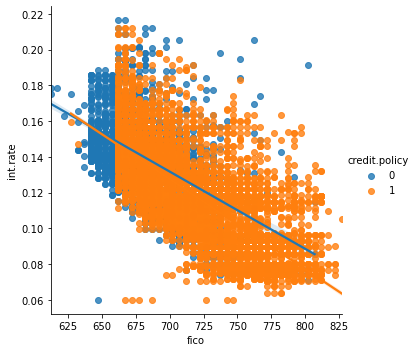

In [23]:
plt.figure(figsize=(15,10))
sns.lmplot(x='fico',y='int.rate',data=df,hue='credit.policy')

<Figure size 1080x720 with 0 Axes>

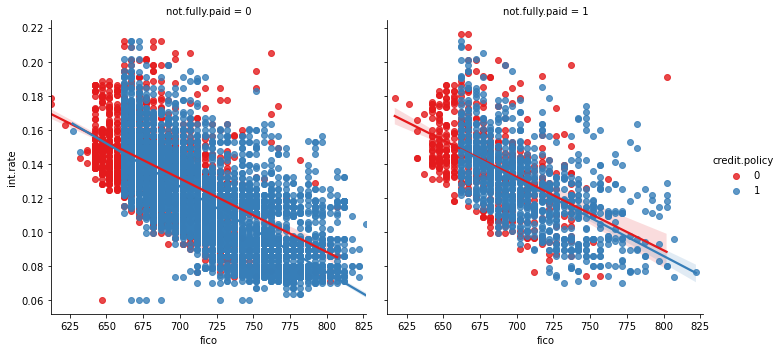

In [24]:
plt.figure(figsize=(15,10))
sns.lmplot(x='fico',y='int.rate',data=df,hue='credit.policy',col='not.fully.paid',palette='Set1')

In [25]:
cat_f=['purpose']

In [27]:
 final_d=pd.get_dummies(df,columns=cat_f,drop_first=True)

In [28]:
final_d.info()
final_d.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split#train test split
X=final_d.drop('not.fully.paid',axis=1)

y=final_d['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

  

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [34]:
dtree.fit(X_train,y_train)
prey=dtree.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prey))
print(classification_report(y_test,prey))

[[2012  419]
 [ 338  105]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.76      0.74      0.75      2874



In [40]:
#Random forest
from  sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
predi=rfc.predict(X_test)
print(confusion_matrix(y_test,predi))
print(classification_report(y_test,predi))

[[2415   16]
 [ 432   11]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.41      0.02      0.05       443

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.48      2874
weighted avg       0.78      0.84      0.78      2874



In [44]:
type(y_test)

pandas.core.series.Series